# 🌏Analysis of global space exploration from 2000 to 2025🪐🛰️

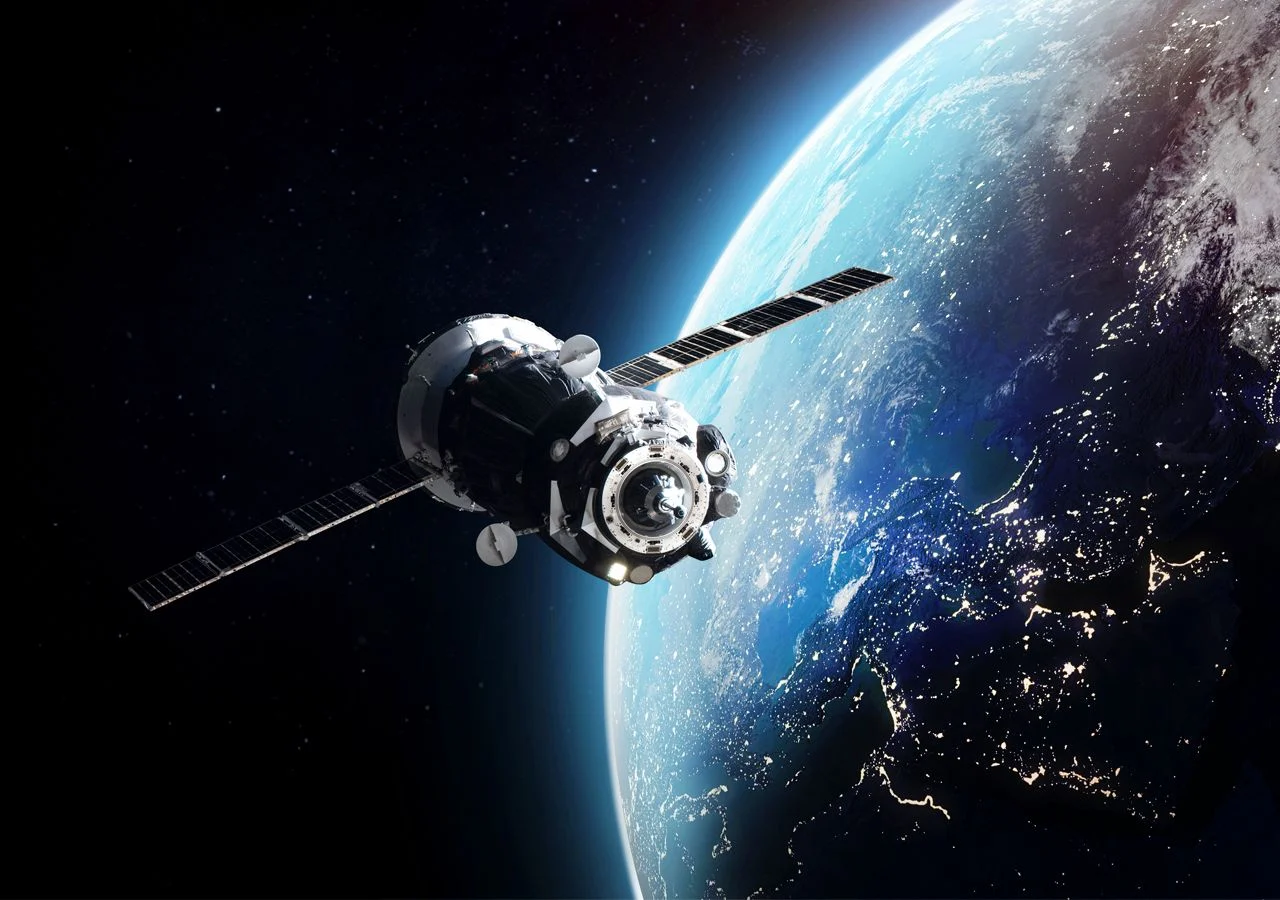

In [ ]:
from IPython.display import display, Image  #here I attach an image for the analysis
image_path = '/Users/felipeperdomo/Downloads/si-los-romanos-hubieran-lanzado-un-satelite-caeria-hoy-316651-1_1280.webp'
display(Image(filename=image_path, width=700))

In [ ]:
#you can check the dataset information in the txt file attached to the repository📂

In [4]:
# first let's import the libraries needed for the analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [5]:
# here im loading de dataset
ds = pd.read_csv("/Users/felipeperdomo/Desktop/Downloads/Global_Space_Exploration_Dataset.csv")

In [6]:
ds.head() # Display the first few rows of the dataset

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,"France, UK, Russia",112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,"Germany, Israel",236
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,"China, Israel, USA",238
3,UAE,2010,Grass-roots 6thgeneration implementation,Unmanned,Mariastad,Spy,37.27,58,Traditional Rocket,Low,USA,186
4,India,2006,Balanced discrete orchestration,Manned,North Jasonborough,Weather,18.95,91,Solar Propulsion,Medium,"Israel, China, India",277


In [7]:
ds.info() #Display summary info, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  3000 non-null   object 
 1   Year                     3000 non-null   int64  
 2   Mission Name             3000 non-null   object 
 3   Mission Type             3000 non-null   object 
 4   Launch Site              3000 non-null   object 
 5   Satellite Type           3000 non-null   object 
 6   Budget (in Billion $)    3000 non-null   float64
 7   Success Rate (%)         3000 non-null   int64  
 8   Technology Used          3000 non-null   object 
 9   Environmental Impact     3000 non-null   object 
 10  Collaborating Countries  3000 non-null   object 
 11  Duration (in Days)       3000 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 281.4+ KB


In [8]:
ds.isnull().sum() #confirming there are no missing (null values) in the dataset

Country                    0
Year                       0
Mission Name               0
Mission Type               0
Launch Site                0
Satellite Type             0
Budget (in Billion $)      0
Success Rate (%)           0
Technology Used            0
Environmental Impact       0
Collaborating Countries    0
Duration (in Days)         0
dtype: int64

In [9]:
ds.sample(15) # Here, I'm checking 15 random rows in the dataset

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
2893,India,2015,Cross-platform client-server frame,Unmanned,Burkemouth,Research,22.97,54,Reusable Rocket,Medium,India,343
1542,USA,2021,Decentralized intangible capacity,Unmanned,Patrickmouth,Weather,49.30,77,AI Navigation,Low,Japan,75
376,Russia,2020,Extended tertiary instruction set,Manned,Patelview,Spy,45.52,60,Traditional Rocket,High,"Germany, France, Israel",294
292,Russia,2012,Re-engineered impactful implementation,Manned,West Jennifer,Navigation,38.56,86,AI Navigation,High,"Israel, USA, China",151
2647,China,2002,Universal actuating Graphic Interface,Manned,Bakerborough,Weather,33.41,87,AI Navigation,Medium,India,200
2024,Russia,2023,Future-proofed system-worthy support,Unmanned,Port Jasonton,Research,11.82,54,Reusable Rocket,High,China,364
677,Israel,2006,Balanced asymmetric hub,Manned,Terrellbury,Weather,22.83,65,Traditional Rocket,Medium,UAE,290
2732,Israel,2013,Robust grid-enabled alliance,Unmanned,West Ann,Weather,27.24,60,Traditional Rocket,High,"UAE, Israel, Japan",151
622,Israel,2016,Open-source 4thgeneration intranet,Unmanned,Brownville,Research,43.31,91,AI Navigation,Medium,UK,180
1147,USA,2023,Optional incremental pricing structure,Manned,East Jessica,Navigation,46.87,57,Nuclear Propulsion,High,"Japan, Israel, Germany",307


# ⬇️Count the number of missions by year and mission type(Manned or Unmanned) by the entire world🌏

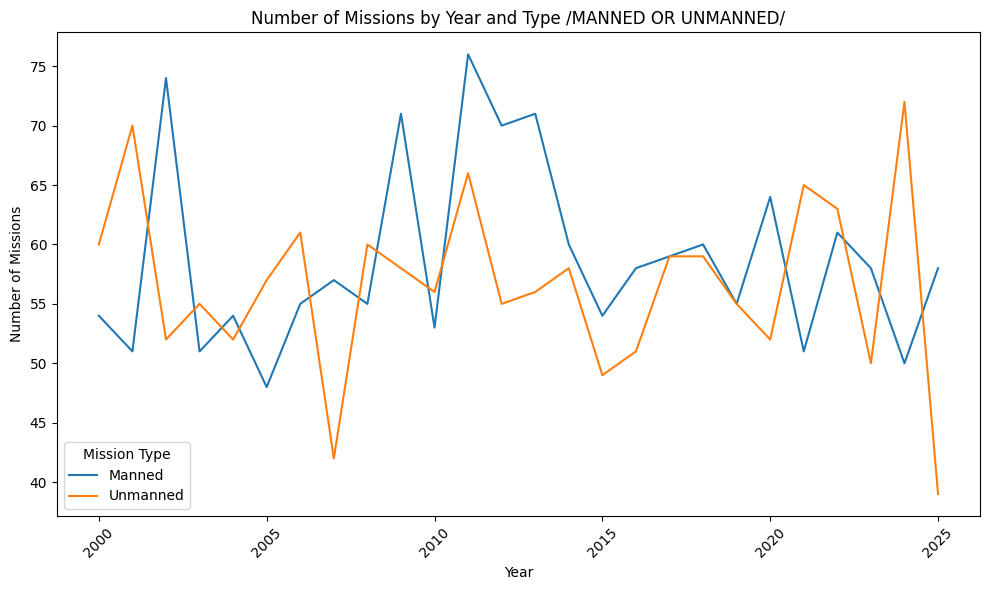

In [10]:
# Count the number of missions by year and mission type(Manned or Unmanned) by the entire world🌏
mission_counts = ds.groupby(['Year', 'Mission Type']).size().reset_index(name='Mission Count')

# Create the bar plot
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Mission Count', hue='Mission Type', data=mission_counts)

plt.title('Number of Missions by Year and Type /MANNED OR UNMANNED/')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)  # Rotate X-axis labels for better visibility
plt.legend(title='Mission Type')
plt.tight_layout()  # Adjust layout to prevent cutting off the graph
plt.show()

# 🌏🛰️Count the number of missions manned or unmanned by country⬇️⬇️

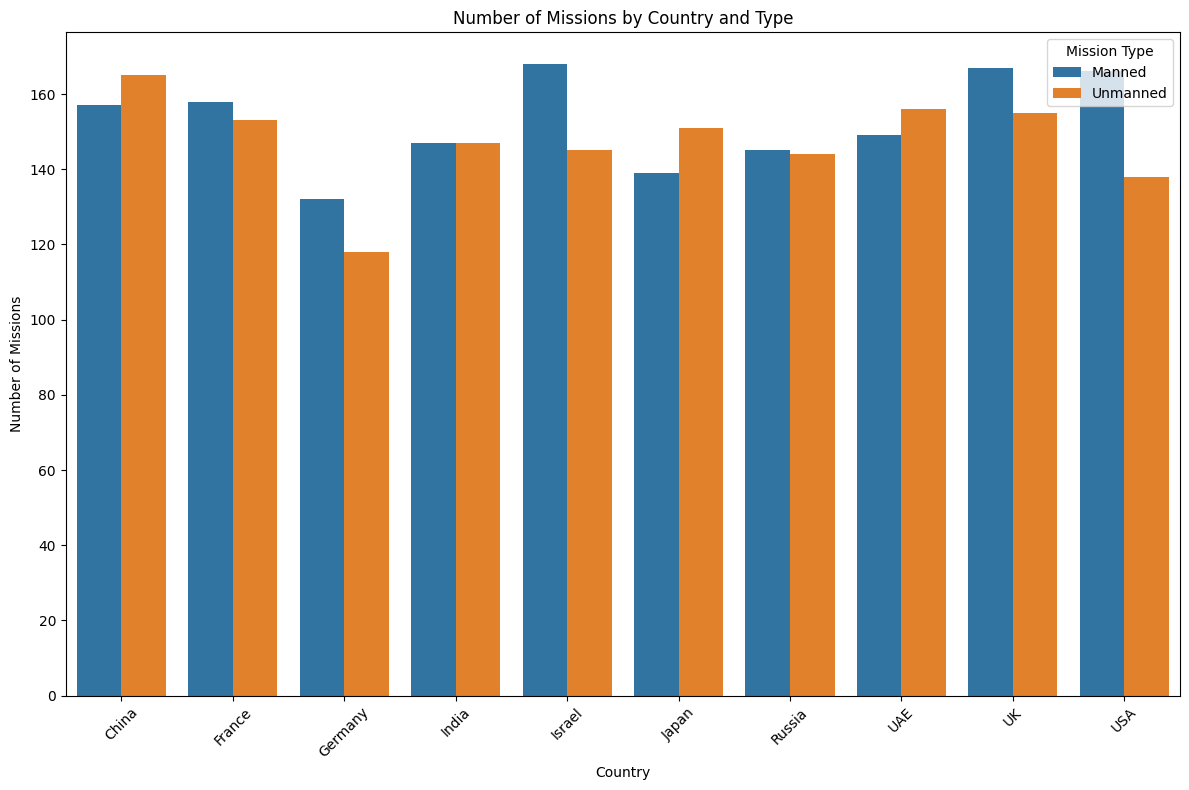

In [ ]:
# Create the bar plot grouped by country
mission_counts_by_country = ds.groupby(['Country', 'Mission Type']).size().reset_index(name='Mission Count')
plt.figure(figsize=(12,8))
sns.barplot(x='Country', y='Mission Count', hue='Mission Type', data=mission_counts_by_country)

plt.title('Number of Missions by Country and Type')
plt.xlabel('Country')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)  # Rotate X-axis labels for better visibility
plt.legend(title='Mission Type')
plt.tight_layout()  # Adjust layout to prevent cutting off the graph
plt.show()

# Number of missions by satellite type🛰️

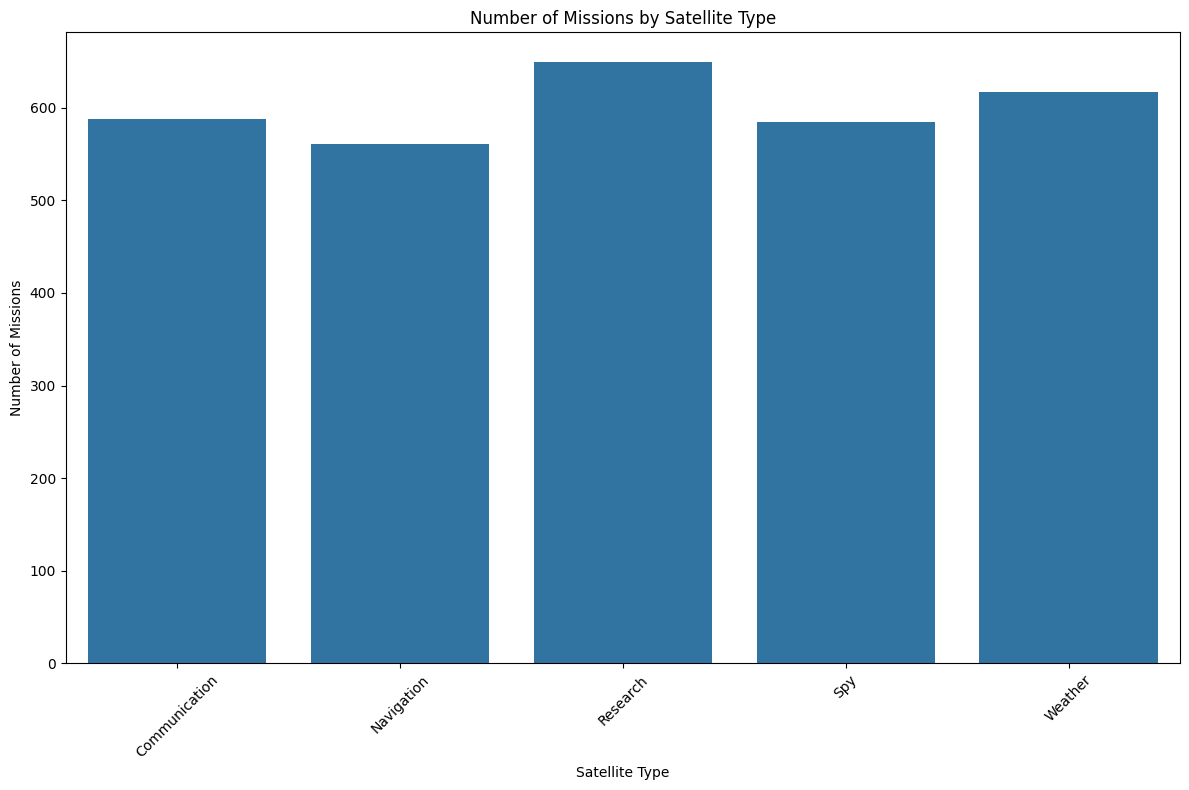

In [28]:
satellite_counts = ds.groupby('Satellite Type').size().reset_index(name='Mission Count')

plt.figure(figsize=(12, 8))
sns.barplot(x='Satellite Type', y='Mission Count', data=satellite_counts)

plt.title('Number of Missions by Satellite Type')
plt.xlabel('Satellite Type')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
#⬆️ I find it very interesting that the number of spy satellites is one of the most launched.⬆️

# I'm going to start researching which countries have launched the most spy satellites.

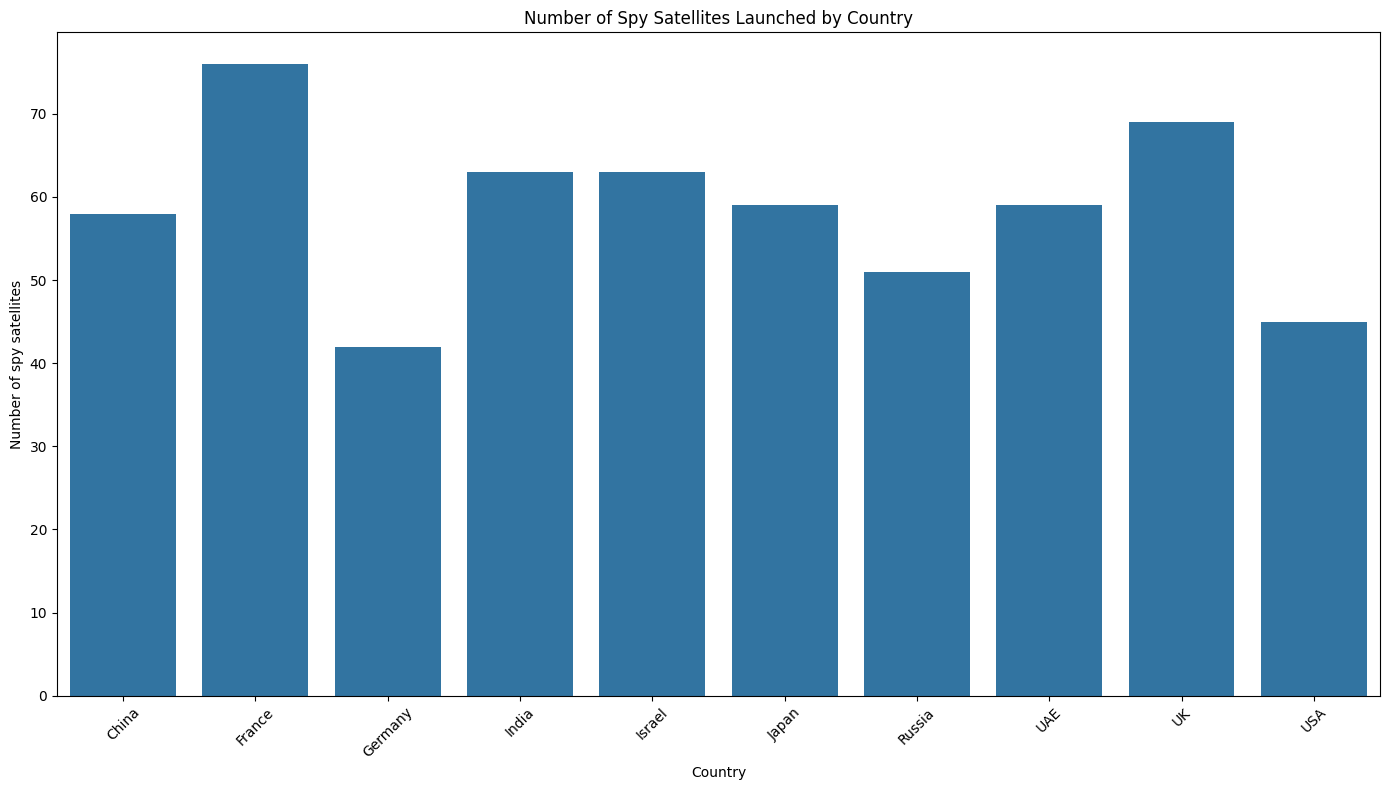

In [29]:
spy_satellites = ds[ds['Satellite Type'] == 'Spy']
spy_counts_by_country = spy_satellites.groupby('Country').size().reset_index(name='Spy Satellite Count')

plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Spy Satellite Count', data=spy_counts_by_country)

plt.title('Number of Spy Satellites Launched by Country')
plt.xlabel('Country')
plt.ylabel('Number of spy satellites')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# It's interesting to see that France leads in spy satellites in this dataset, 
# while China and the USA are often considered major players in this area. 
# This could be due to the classification of spy satellites.

# let's go deeper

# Most Used Technologies in Space Missions⬇️

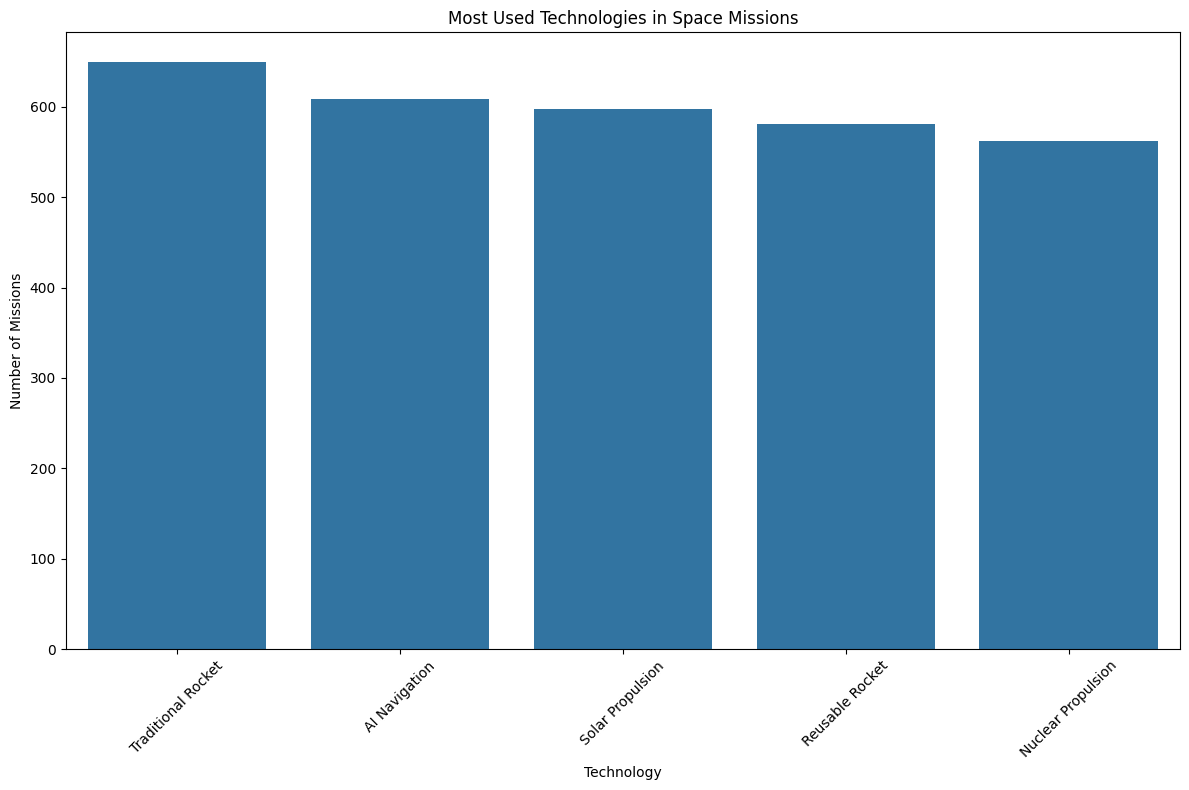

In [ ]:
tech_counts = ds['Technology Used'].value_counts().reset_index()
tech_counts.columns = ['Technology Used', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(x='Technology Used', y='Count', data=tech_counts)
plt.title('Most Used Technologies in Space Missions')
plt.xlabel('Technology')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
#⬆️We can see that the most used technology is traditional rocket, followed by AI navigation.⬆️

# let's see the proportions by country, to see what type of technology each country uses the most.

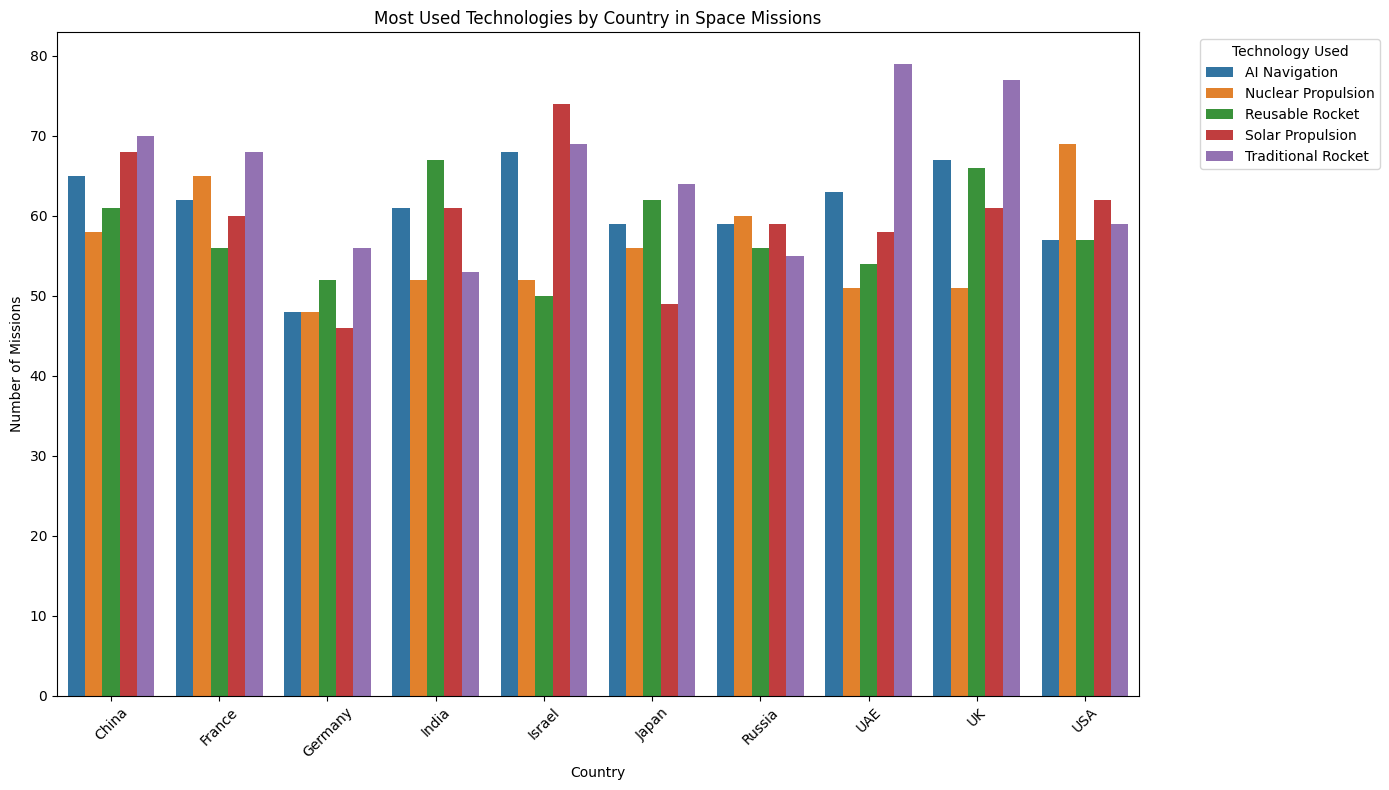

In [ ]:
tech_by_country = ds.groupby(['Country', 'Technology Used']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Count', hue='Technology Used', data=tech_by_country)
plt.title('Most Used Technologies by Country in Space Missions')
plt.xlabel('Country')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.legend(title='Technology Used', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
# I find it very interesting to see that the United States is leading with nuclear propulsion,
# I will go deeper into the United States to see its evolution over the years with this type of technology.

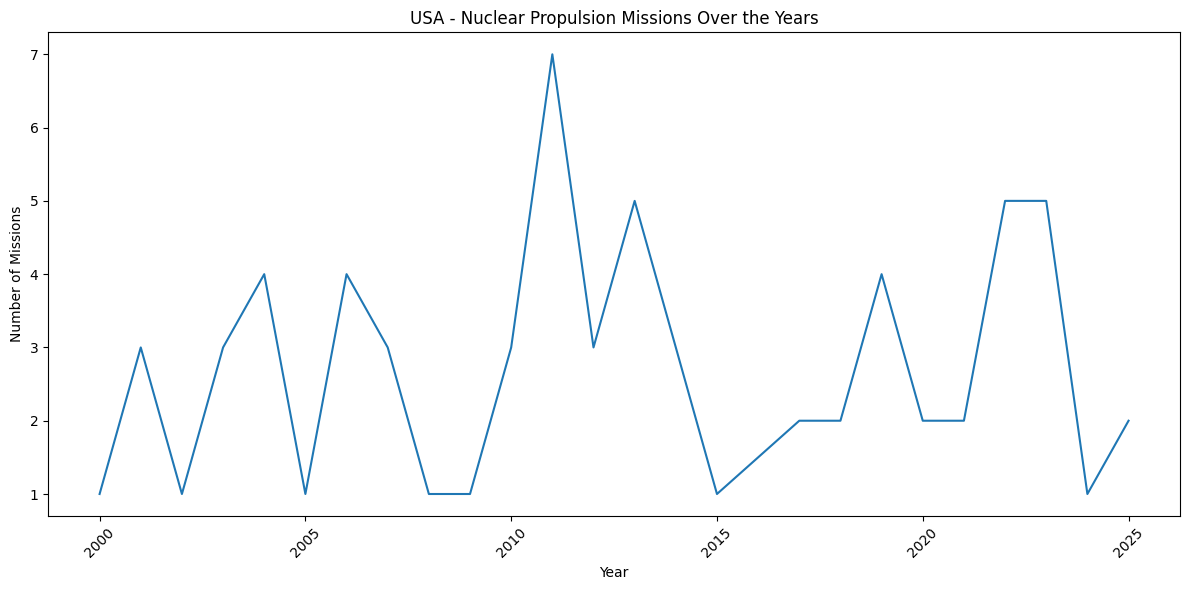

In [20]:
usa_nuclear = ds[(ds['Country'] == 'USA') & (ds['Technology Used'] == 'Nuclear Propulsion')]
nuclear_by_year = usa_nuclear.groupby('Year').size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Count', data=nuclear_by_year)
plt.title('USA - Nuclear Propulsion Missions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
#  2011 appears to be the peak year for nuclear propulsion missions in this dataset.
#  This may reflect a real increase in activity or could be influenced by data availability or classification nuances.

# Now let's take a look at the evolution of reusable rockets in the United States.⬇️

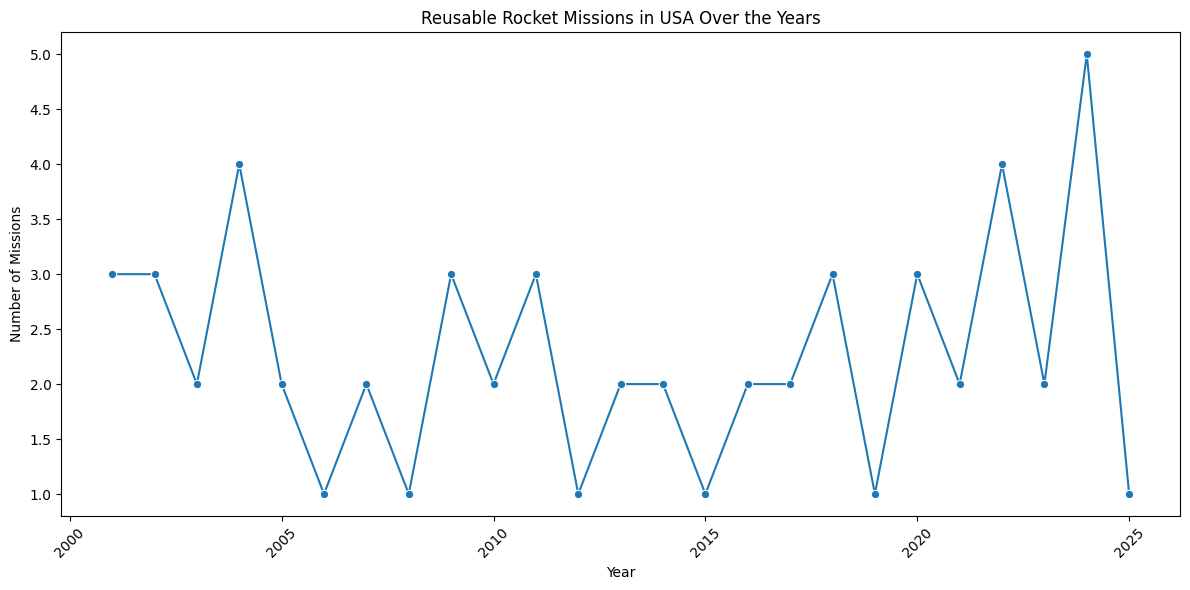

In [22]:
usa_reusable = ds[(ds['Country'] == 'USA') & (ds['Technology Used'] == 'Reusable Rocket')]
usa_reusable_counts = usa_reusable.groupby('Year').size().reset_index(name='Reusable Rocket Missions')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Reusable Rocket Missions', data=usa_reusable_counts, marker='o')
plt.title('Reusable Rocket Missions in USA Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# # We can see that 2025 and the last few years show a peak in reusable rocket missions.
# This trend may be influenced by Elon Musk's initiatives toward Mars colonization and round-trip space travel.
# (there is a drop in the graph at the end simply because the dataset provides data up to 2025.)

# Distribution of Success Rate by Type of Technology Used in Space Missions.⬇️

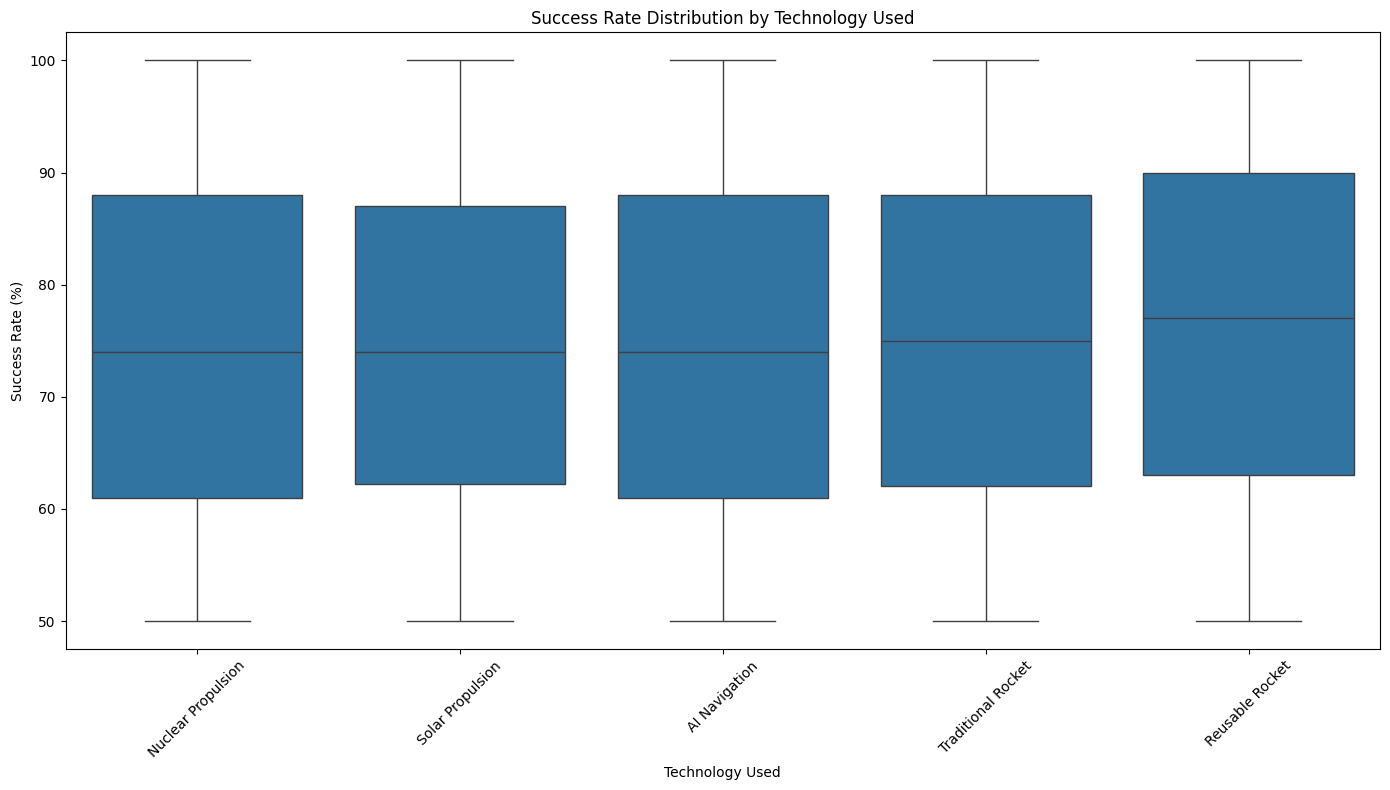

      Technology Used  Success Rate (%)
2     Reusable Rocket         76.225473
4  Traditional Rocket         75.124615
3    Solar Propulsion         74.632107
1  Nuclear Propulsion         74.596085
0       AI Navigation         74.357964


In [24]:
# Filter out rows where 'Technology Used' or 'Success Rate (%)' are missing
tech_success = ds.dropna(subset=['Technology Used', 'Success Rate (%)'])

# Calculate the mean success rate by technology type
tech_success_mean = tech_success.groupby('Technology Used')['Success Rate (%)'].mean().reset_index()

# Create a boxplot to visualize the distribution of success rate for each technology
plt.figure(figsize=(14, 8))
sns.boxplot(x='Technology Used', y='Success Rate (%)', data=tech_success)

plt.title('Success Rate Distribution by Technology Used')
plt.xlabel('Technology Used')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show the mean success rate for each technology
print(tech_success_mean.sort_values('Success Rate (%)', ascending=False))

# ♻️Environmental Impact Distribution by Technology Used 

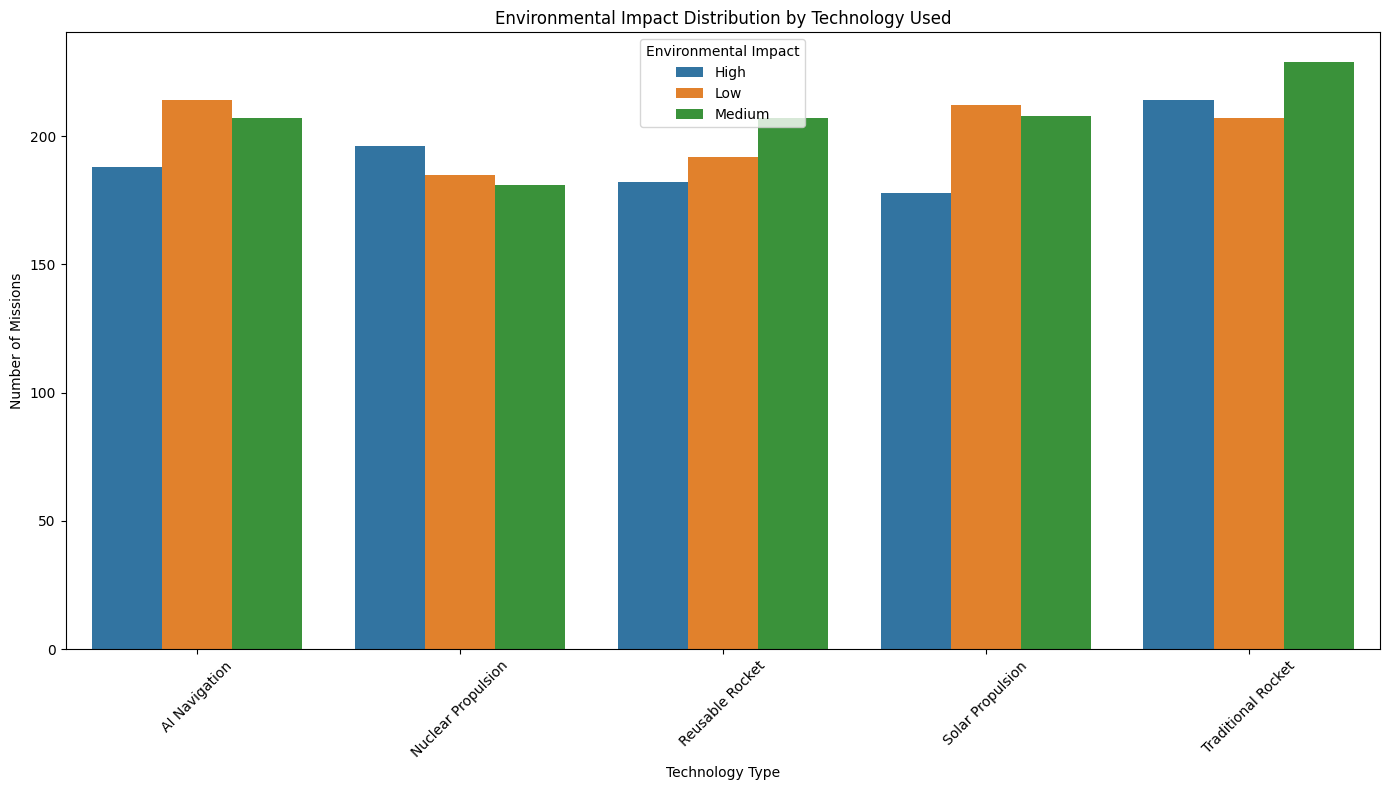

In [25]:
tech_impact = ds.dropna(subset=['Technology Used', 'Environmental Impact'])

impact_counts = tech_impact.groupby(['Technology Used', 'Environmental Impact']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
sns.barplot(x='Technology Used', y='Count', hue='Environmental Impact', data=impact_counts)

plt.title('Environmental Impact Distribution by Technology Used')
plt.xlabel('Technology Type')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# We can see that solar propulsion is the least pollutant.

In [ ]:
# if you got this far I recommend you to read the attached final conclusions.